In [131]:
import pandas as pd
import numpy as np
import random as rd

import seaborn as sns
sns.set(color_codes=True)
import matplotlib.pyplot as plt
%matplotlib inline

In [132]:
# Acquiring Data
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

combine = [train_df,test_df]

In [133]:
print train_df.columns.values

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


**Caterogical Features:** Survived, Pclass, Sex, Embarked
>           Ordinal Feature: Pclass

**Numerical Features:**

>           Continuous: Age, Fare.
>           Descrete: SibSp, Parch.

In [134]:
train_df.describe(percentiles=[.5,.6,.68,.75,.8,.95,.99])

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
60%,535.000000,0.000000,3.000000,31.800000,0.000000,0.000000,21.679200
68%,606.200000,1.000000,3.000000,35.000000,0.000000,0.000000,26.307500
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
80%,713.000000,1.000000,3.000000,41.000000,1.000000,1.000000,39.687500
95%,846.500000,1.000000,3.000000,56.000000,3.000000,2.000000,112.079150


- around 38% people Survived (mean(Survived) = 0.38) in total of 891 Samples
- Approx 30% were with their Sibling or Spouse
- More than 75% were with their Parent or Children.
- Less than 1% Elderly(Age > 65) were there.


**Description of Categorical Values**

In [135]:
train_df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Graham, Mr. George Edward",male,CA. 2343,C23 C25 C27,S
freq,1,577,7,4,644


- Names are Unique along the Dataset
- Only 2 Sex variables, with `male` almost 65%. (freq of top(Sex)/count => 577/891)
- Embarked has 3 Unique Variables, with `S` used by most.
- Ticket has most percentage of duplicate values. (Maybe, More than 1 person on 1 Ticket eg. Family)

## Pivoting Features (Correlation)
- Pclass with Survived
- Sex with Survived
- SibSp and Parch with Survived

In [136]:
train_df[['Pclass','Survived']].groupby(['Pclass'],as_index=False).mean().sort_values(by='Survived',ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


Passengers from Class 1st Survived the most.

In [137]:
train_df[['Sex','Survived']].groupby(['Sex'],as_index=False).mean().sort_values(by='Survived',ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


74% Females Survived.

In [138]:
train_df[['Parch','Survived']].groupby(['Parch'],as_index=False).mean().sort_values(by='Survived',ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


In [139]:
train_df[['SibSp','Survived']].groupby(['SibSp'],as_index=False).mean().sort_values(by='Survived',ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


## Visualizing Data

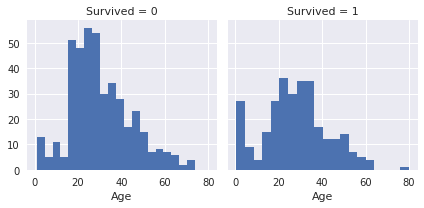

In [140]:
g = sns.FacetGrid(train_df,col='Survived')
g.map(plt.hist, 'Age', bins=20)

- Most of Infants Survived
- Oldest Passengers Survived
- Most of 15-25 Year Old did not survived

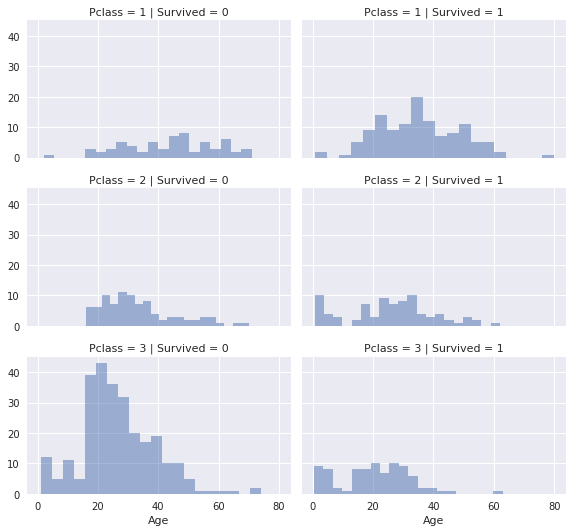

In [141]:
grid = sns.FacetGrid(train_df, col='Survived', row='Pclass',size=2.5, aspect=1.6)
grid.map(plt.hist,'Age', alpha=.5, bins=20)
grid.add_legend()

- Most of Pclass-3 didn't survived. It also had Most passengers
- most Infants of class2 and class3 survived
- Most passengers in class 1 survived

**Correlating Categorical Features**

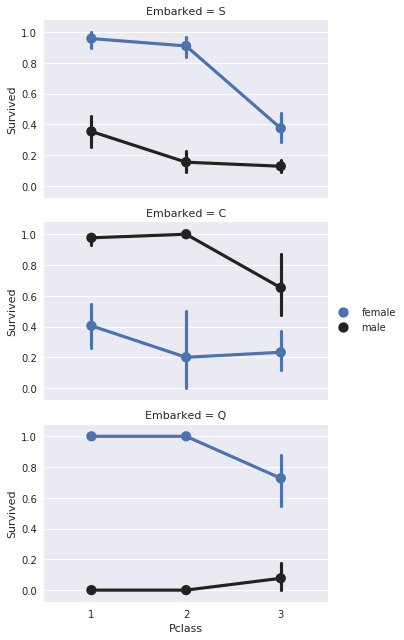

In [142]:
grid = sns.FacetGrid(train_df, row='Embarked', size=3, aspect=1.6)
grid.map(sns.pointplot, 'Pclass','Survived','Sex')
grid.add_legend()

- Female passangers had much better survival rate than male.
- Except in Embarked=C, where Males had higher survival rate.
- Males had better Survival rate in Class-3 when compared in Embarked-Q and C.

### Correlating Categorical & Numerical features

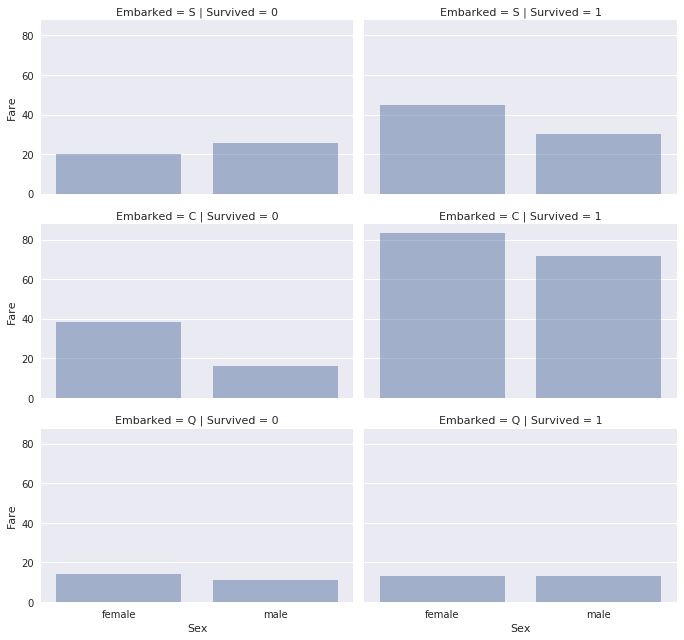

In [143]:
grid = sns.FacetGrid(train_df, row='Embarked',col='Survived', size=3,aspect=1.6)
grid.map(sns.barplot, 'Sex','Fare',alpha=.5, ci=None)

- Higher Paying Passangers had better survival rates than lower ones.
- Embarked definetely correlates to Survival.

## Data Wrangling

`Cabin` and `Ticket` do not correlate with `Survived` 

In [144]:
train_df.drop(['Ticket','Cabin'], axis=1,inplace=True)
test_df.drop(['Ticket','Cabin'], axis=1,inplace=True)

In [145]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


**Creating a New Feature from Existing**

    using Name Title (eg. Mr., Miss, etc) as a feature.
    Extracting Title` from Name.

In [146]:
for ds in combine:
    ds['Title'] = ds.Name.str.extract(' ([A-Za-z]+)\.',expand=True)

pd.crosstab(train_df['Title'],train_df['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [147]:
# Replacing many titles with common ones and some with `Rare`
for ds in combine:
    ds['Title'] = ds['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
 	'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    ds['Title'] = ds['Title'].replace('Mlle','Miss')
    ds['Title'] = ds['Title'].replace('Ms','Miss')
    ds['Title'] = ds['Title'].replace('Mme','Miss')

train_df[['Title','Survived']].groupby(['Title'],as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.704301
2,Mr,0.156673
3,Mrs,0.792000
4,Rare,0.347826


In [148]:
## Converting Categorical to Ordinal variable
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
for ds in combine:
    ds['Title'] = ds['Title'].map(title_mapping)
    ds['Title'] = ds['Title'].fillna(0)
train_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,8.4583,Q,1
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,51.8625,S,1
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,21.0750,S,4
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,11.1333,S,3
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,30.0708,C,3


In [149]:
## Dropping Name coloumm from both train and test dataset along with PassenderId

train_df.drop(['Name','PassengerId'],axis=1,inplace=True)
test_df.drop(['Name'],axis=1,inplace=True)
combine = [train_df,test_df]

In [150]:
train_df.shape, test_df.shape

((891, 9), (418, 9))

In [151]:
for ds in combine:
    ds['Sex'] = ds['Sex'].map({'female':1,'male':0}).astype(int)
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,S,1
1,1,1,1,38.0,1,0,71.2833,C,3
2,1,3,1,26.0,0,0,7.9250,S,2
3,1,1,1,35.0,1,0,53.1000,S,3
4,0,3,0,35.0,0,0,8.0500,S,1


### Filling Missing Values

1. **For AGE** : Age, Sex and Pclass may be correlated. So filling values with median of combinations of Sex x Pclass.

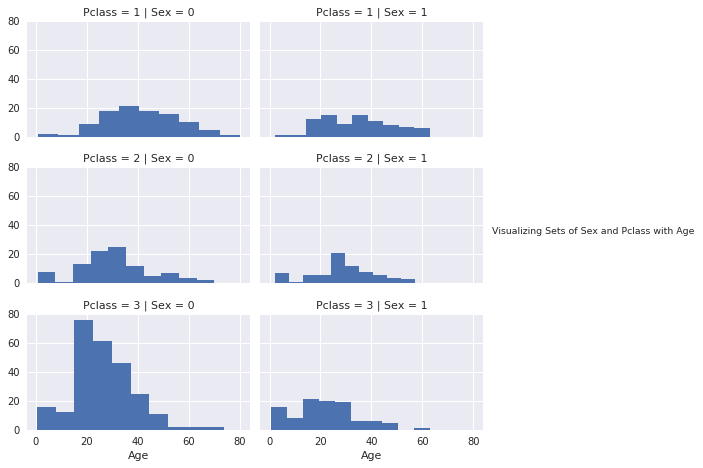

In [152]:
grid = sns.FacetGrid(train_df, row='Pclass',col='Sex',size=2.2,aspect=1.6)
grid.map(plt.hist, 'Age')
grid.add_legend(title="Visualizing Sets of Sex and Pclass with Age")

In [153]:
## matrix to store median Age for each set of Pclass and Sex
guess_age = np.zeros((2,3))

In [154]:
## Iterating over Sex and Pclass to get median ages
for ds in combine:
    ## For both test and train datasets
    for s in range(0,2):
        for p in range(1,4):
            guess_df = ds[(ds['Sex']==s) & (ds['Pclass']==p)]['Age'].dropna()
            age_guess = guess_df.median()
            ## getting nearest 0.5 age
            guess_age[s,p-1] = round((age_guess))
    
    for s in range(0,2):
        for p in range(1,4):
            ds.loc[(ds.Age.isnull()) & (ds.Sex==s) & (ds.Pclass==p), 'Age'] = guess_age[s,p-1]

train_df.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,S,1
1,1,1,1,38.0,1,0,71.2833,C,3
2,1,3,1,26.0,0,0,7.9250,S,2
3,1,1,1,35.0,1,0,53.1000,S,3
4,0,3,0,35.0,0,0,8.0500,S,1
5,0,3,0,25.0,0,0,8.4583,Q,1
6,0,1,0,54.0,0,0,51.8625,S,1
7,0,3,0,2.0,3,1,21.0750,S,4
8,1,3,1,27.0,0,2,11.1333,S,3
9,1,2,1,14.0,1,0,30.0708,C,3


In [155]:
## Creating Age Band
train_df['AgeBand'] = pd.cut(train_df['Age'],5,precision=0)
train_df[['AgeBand','Survived']].groupby(['AgeBand'],as_index=False).mean().sort_values(by='AgeBand',ascending=True)

,AgeBand,Survived
0,"(0.0, 16.0]",0.550000
1,"(16.0, 32.0]",0.336714
2,"(32.0, 48.0]",0.412844
3,"(48.0, 64.0]",0.434783
4,"(64.0, 80.0]",0.090909


In [156]:
## Replacing Age with Ordinal Values of these Bands.
for ds in combine:
    ds.loc[ds.Age<=16, 'Age'] = int(0)
    ds.loc[(ds.Age<=32)&(ds.Age>16), 'Age'] = int(1)
    ds.loc[(ds.Age>32)&(ds.Age<=48), 'Age'] = int(2)
    ds.loc[(ds.Age>48)&(ds.Age<=64), 'Age'] = int(3)
    ds.loc[(ds.Age>64)&(ds.Age<=80), 'Age'] = int(4)
train_df.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeBand
0,0,3,0,1.0,1,0,7.2500,S,1,"(16.0, 32.0]"
1,1,1,1,2.0,1,0,71.2833,C,3,"(32.0, 48.0]"
2,1,3,1,1.0,0,0,7.9250,S,2,"(16.0, 32.0]"
3,1,1,1,2.0,1,0,53.1000,S,3,"(32.0, 48.0]"
4,0,3,0,2.0,0,0,8.0500,S,1,"(32.0, 48.0]"
5,0,3,0,1.0,0,0,8.4583,Q,1,"(16.0, 32.0]"
6,0,1,0,3.0,0,0,51.8625,S,1,"(48.0, 64.0]"
7,0,3,0,0.0,3,1,21.0750,S,4,"(0.0, 16.0]"
8,1,3,1,1.0,0,2,11.1333,S,3,"(16.0, 32.0]"
9,1,2,1,0.0,1,0,30.0708,C,3,"(0.0, 16.0]"


In [157]:
## Removing the AgeBand Feature
train_df.drop(['AgeBand'],axis=1,inplace=True)
train_df.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,1.0,1,0,7.2500,S,1
1,1,1,1,2.0,1,0,71.2833,C,3
2,1,3,1,1.0,0,0,7.9250,S,2
3,1,1,1,2.0,1,0,53.1000,S,3
4,0,3,0,2.0,0,0,8.0500,S,1
5,0,3,0,1.0,0,0,8.4583,Q,1
6,0,1,0,3.0,0,0,51.8625,S,1
7,0,3,0,0.0,3,1,21.0750,S,4
8,1,3,1,1.0,0,2,11.1333,S,3
9,1,2,1,0.0,1,0,30.0708,C,3


### Creating New Features

Can Create a new feature `FamilySize` from `Parch` and `SibSp`, then drop both these columns

In [158]:
for ds in combine:
    ds['FamilySize'] = ds.SibSp + ds.Parch + 1

train_df[['FamilySize','Survived']].groupby(['FamilySize'],as_index=False).mean().sort_values(by='Survived',
                                                                                              ascending=False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


**Can Create `isAlone` from FamilySize**

In [159]:
for ds in combine:
    ds['isAlone'] = 0
    ds.loc[ds['FamilySize']==1,'isAlone'] = 1

train_df[['isAlone','Survived']].groupby(['isAlone'],as_index=False).mean()

,isAlone,Survived
0,0,0.505650
1,1,0.303538


Dropping `Parch, SibSp, FamilySize` in favour of `isAlone`

In [160]:
for ds in combine:
    ds.drop(['Parch','SibSp','FamilySize'],axis=1,inplace=True)

In [161]:
train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,isAlone
0,0,3,0,1.0,7.2500,S,1,0
1,1,1,1,2.0,71.2833,C,3,0
2,1,3,1,1.0,7.9250,S,2,1
3,1,1,1,2.0,53.1000,S,3,0
4,0,3,0,2.0,8.0500,S,1,1


## Filling NA values in `Embarked`

Filling `NA` with the most common occurence.

In [162]:
most_common = train_df.Embarked.dropna().mode()[0]

for ds in combine:
    ds['Embarked'] = ds['Embarked'].fillna(most_common)

train_df[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().\
                    sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


**Comverting `Embarked` to numerical feature**

In [163]:
for ds in combine:
    ds['Embarked'] = ds.Embarked.map({'S':0,'C':1,'Q':2}).astype(int)
    
train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,isAlone
0,0,3,0,1.0,7.2500,0,1,0
1,1,1,1,2.0,71.2833,1,3,0
2,1,3,1,1.0,7.9250,0,2,1
3,1,1,1,2.0,53.1000,0,3,0
4,0,3,0,2.0,8.0500,0,1,1


**Filling `NA` in `Fare`**

In [164]:
for ds in combine:
    ds['Fare'].fillna(ds.Fare.dropna().median(),inplace=True)

In [165]:
for ds in combine:
    print ds['Fare'].isnull().values.sum()

print train_df['Fare'].isnull().values.sum()
print test_df['Fare'].isnull().values.sum()

0
0
0
0


### Creating a feature `FareBand`

In [166]:
train_df['FareBand'] = pd.qcut(train_df.Fare,4)
train_df[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().\
                                                sort_values(by='FareBand', ascending=True)
train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,isAlone,FareBand
0,0,3,0,1.0,7.2500,0,1,0,"(-0.001, 7.91]"
1,1,1,1,2.0,71.2833,1,3,0,"(31.0, 512.329]"
2,1,3,1,1.0,7.9250,0,2,1,"(7.91, 14.454]"
3,1,1,1,2.0,53.1000,0,3,0,"(31.0, 512.329]"
4,0,3,0,2.0,8.0500,0,1,1,"(7.91, 14.454]"


In [167]:
## Converting FareBand into Ordinal
for dataset in combine:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)

train_df = train_df.drop(['FareBand'], axis=1)
combine = [train_df, test_df]
    
train_df.head(10)

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,isAlone
0,0,3,0,1.0,0,0,1,0
1,1,1,1,2.0,3,1,3,0
2,1,3,1,1.0,1,0,2,1
3,1,1,1,2.0,3,0,3,0
4,0,3,0,2.0,1,0,1,1
5,0,3,0,1.0,1,2,1,1
6,0,1,0,3.0,3,0,1,1
7,0,3,0,0.0,2,0,4,0
8,1,3,1,1.0,1,0,3,0
9,1,2,1,0.0,2,1,3,0


# Modeling & Predicting

In [173]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
# from sklearn.cross_validation import train_test_split

In [169]:
X_train = train_df.drop(['Survived'],axis=1)
Y_train = train_df['Survived']

X_test = test_df.drop("PassengerId",axis=1).copy()

X_train.shape, Y_train.shape, X_test.shape

((891, 7), (891,), (418, 7))

In [170]:
test_df.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,isAlone
0,892,3,0,2.0,0,2,1,1
1,893,3,1,2.0,0,0,3,0
2,894,2,0,3.0,1,2,1,1
3,895,3,0,1.0,1,0,1,1
4,896,3,1,1.0,1,0,3,0


**Logistic Regression**

In [183]:
logReg = LogisticRegression()
logReg.fit(X_train,Y_train)
Y_pred = logReg.predict(X_test)
acc_log = round(logReg.score(X_train,Y_train)*100,2)
acc_log

array([[-1.17754581,  2.18930255, -0.52811102, -0.00232966,  0.292685  ,
         0.42006222,  0.27486152]])

Examining Coefficients from Logistic Regression to evaluate the Feature Engineering process.

In [188]:
coeff_df = pd.DataFrame(X_train.columns)
coeff_df.columns = ['Feature']
coeff_df['Correlation'] = pd.Series(logReg.coef_[0])

coeff_df.sort_values(by='Correlation',ascending=False)
# coeff_df

,Feature,Correlation
1,Sex,2.189303
5,Title,0.420062
4,Embarked,0.292685
6,isAlone,0.274862
3,Fare,-0.002330
2,Age,-0.528111
0,Pclass,-1.177546


`-ve value` means less probability and `+ve` means more probable to Survive.

**SVM**

In [189]:
svc = SVC()
svc.fit(X_train,Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train,Y_train)*100,2)
acc_svc

83.39

In [190]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
acc_knn

84.96

In [191]:
gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)
acc_gaussian

77.33

In [192]:
perceptron = Perceptron()
perceptron.fit(X_train, Y_train)
Y_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)
acc_perceptron

/usr/local/lib/python2.7/dist-packages/sklearn/linear_model/stochastic_gradient.py:84: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


78.9

In [193]:
linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)
Y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)
acc_linear_svc

80.02

In [194]:
sgd = SGDClassifier()
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)
acc_sgd

/usr/local/lib/python2.7/dist-packages/sklearn/linear_model/stochastic_gradient.py:84: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


71.83

In [195]:
# Decision Tree

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree

86.64

In [196]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

86.64

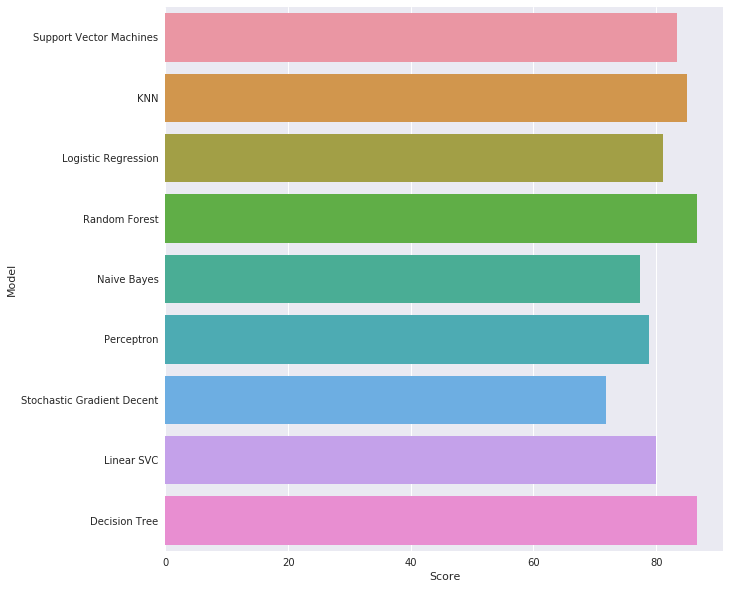

In [208]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_linear_svc, acc_decision_tree]})
fig, ax = plt.subplots(figsize=(10,10))
sns.barplot(ax=ax, y= models['Model'],x=models['Score'])